In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the training dataset
dataset_train = pd.read_csv("rnn_google_stock/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values # all rows, column[1,2]

In [5]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set) # scaled all the numerical values range from (0:min) to (1:max)

In [9]:
# Creating a data structure with 60 timesteps and 1 output
#      /\
# 1256 |
#      |
#      | X:0          59     Y:60
#   60 | |||||||||||||||     |||
#        Time series       output value

X_train = []
Y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0]) # Only Open column vale
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

print((X_train.shape[0], X_train.shape[1], 1))
# Reshaping                         1198      x       60  
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # 0=rows, 1=columns; reshaping in 3-D

(1198, 60, 1)


In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential # because we have a sequential data
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
# Initializing the RNN
regressor = Sequential()

In [14]:
# Adding the first LSTM layer and some Dropout regularization
# 60 input 50 output; (60 coming in 50 going out)
#               Dimension of output                           Dimension of input     
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))  # Dropout some unnecessary amount of data; ie. 0.2 (Turn off 20% neurons randomly)

In [15]:
# Adding a second LSTM layer and some Dropout regularization
# no iinput_shape; because here the input shape = output shape that is 50.
regressor.add(LSTM(units = 50, return_sequences = True)) 
regressor.add(Dropout(0.2))

In [16]:
# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [19]:
# Compiling the RNN
# adam is optimizer for big data
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
# fitting the RNN to the Training set
#             input    output   repeat        batch
regressor.fit(X_train, Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 83ms/step - loss: 0.0429
Epoch 2/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0056
Epoch 3/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0045
Epoch 8/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0039
Epoch 10/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0043
Epoch 11/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0041
Epoch 13/100
38/38 [=====

In [21]:
# Making the prediction and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv("rnn_google_stock/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [23]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1) # reshape to have only 1 column
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

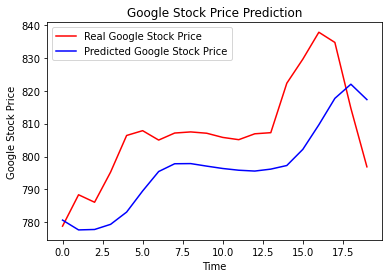

In [25]:
# Visualizing the result
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()